In [2]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df_train = pd.read_csv('C:/Users/sri03/Downloads/archive/Genre Classification Dataset/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
print(df_train)

                                            Title        Genre  \
1                    Oscar et la dame rose (2009)        drama   
2                                    Cupid (1997)     thriller   
3                Young, Wild and Wonderful (1980)        adult   
4                           The Secret Sin (1915)        drama   
5                          The Unrecovered (2007)        drama   
...                                           ...          ...   
54210                             "Bonino" (1953)       comedy   
54211                 Dead Girls Don't Cry (????)       horror   
54212   Ronald Goedemondt: Ze bestaan echt (2008)  documentary   
54213                    Make Your Own Bed (1944)       comedy   
54214  Nature's Fury: Storm of the Century (2006)      history   

                                             Description  
1      Listening in to a conversation between his doc...  
2      A brother and sister with a past incestuous re...  
3      As the bus empties the 

In [4]:
df_train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
train_df = pd.read_csv('C:/Users/sri03/Downloads/archive/Genre Classification Dataset/test_data.txt', sep=':::', header=None, engine='python')
train_df.columns = ['Id','Title','Description']
train_df.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
test_sol_df = pd.read_csv('C:/Users/sri03/Downloads/archive/Genre Classification Dataset/test_data_solution.txt', sep=':::', header=None, engine='python')
test_sol_df.columns = ['Id','Title','Genre','Description']
test_sol_df.head()

,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
test_sol_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [9]:
test_sol_df.duplicated().sum()

0

In [10]:
output_categories = test_sol_df.Genre.unique()
print(len(output_categories))
output_categories

27


array([' thriller ', ' comedy ', ' documentary ', ' drama ', ' horror ',
       ' short ', ' western ', ' family ', ' sport ', ' romance ',
       ' war ', ' game-show ', ' biography ', ' adult ', ' talk-show ',
       ' action ', ' music ', ' crime ', ' animation ', ' sci-fi ',
       ' adventure ', ' reality-tv ', ' fantasy ', ' mystery ',
       ' history ', ' news ', ' musical '], dtype=object)

In [11]:
genres =test_sol_df.Genre
print(genres)

0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: Genre, Length: 54200, dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
le.fit(genres)
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [14]:
genres = le.transform(genres)
genres

array([24,  5,  7, ...,  1,  8,  8])

In [15]:
test_sol_df['Labeled Genre'] = genres

In [16]:
test_sol_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",24
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8


In [17]:
cat = le.inverse_transform([2])
print(cat[0])
print(type(cat[0]))

 adventure 
<class 'str'>


In [18]:
test_sol_df['Genre'].value_counts()

Genre
 drama           13612
 documentary     13096
 comedy           7446
 short            5072
 horror           2204
 thriller         1590
 action           1314
 western          1032
 reality-tv        883
 family            783
 adventure         775
 music             731
 romance           672
 sci-fi            646
 adult             590
 crime             505
 animation         498
 sport             431
 talk-show         391
 fantasy           322
 mystery           318
 musical           276
 biography         264
 history           243
 game-show         193
 news              181
 war               132
Name: count, dtype: int64

In [19]:
import matplotlib
import matplotlib.pyplot as plt

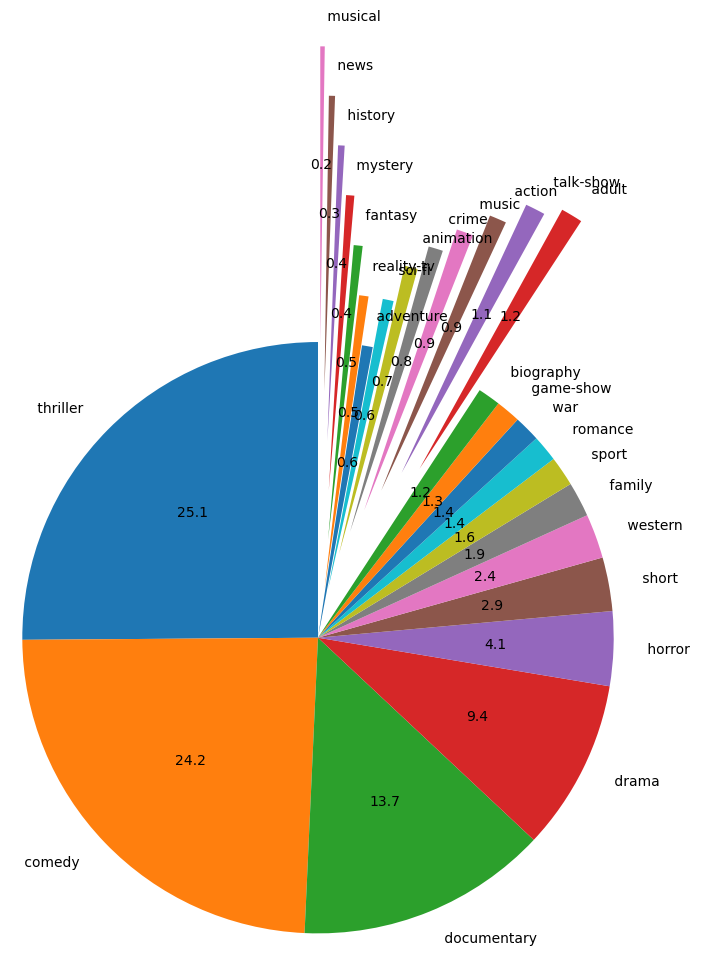

In [20]:
plt.figure(figsize=(8,8))
values = test_sol_df['Genre'].value_counts()
plt.pie(values, labels=output_categories, autopct='%1.1f', startangle=90, radius=1.2, explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.75, 0.65, 0.55, 0.45, 0.35, 0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2))
plt.show()

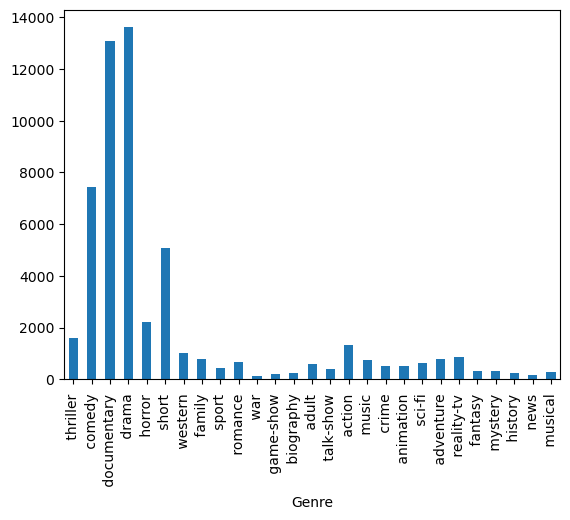

In [21]:
test_sol_df.Genre.value_counts()[test_sol_df.Genre.unique()].plot(kind='bar')
plt.show()

In [22]:
import numpy as np

In [23]:
desc = test_sol_df['Description']
for _ in range(2):
    print(desc[_])
    print("\n")
desc_arr = np.array(desc.tolist())
print(type(desc_arr))

 L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.


 Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers

In [24]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [25]:
wordnet = WordNetLemmatizer()

In [26]:
def preprocess_text(text):
    # removing special characters & numbers and just keeping alphabets
    var = re.sub("[^a-zA-Z]", " ", text)

    # lowercasing
    var = var.lower()

    var = var.split()
    var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))] # removing stopwords
    var = ' '.join(var)

    return var

In [27]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sri03\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords

In [29]:
print(test_sol_df['Description'][0])
t = preprocess_text(test_sol_df['Description'][0])
print("\n>>> After processing:")
t

 L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.

>>> After processing:


'l r brane love life car apartment job especially girlfriend vespa one day showering vespa run shampoo l r run across street convenience store buy quick trip minute return vespa gone every trace existence wiped l r life becomes tortured existence one strange event another occurs confirm mind conspiracy working finding vespa'

In [30]:
test_sol_df['Processed Description'] = test_sol_df['Description'].apply(preprocess_text)
test_sol_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",24,l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5,spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8,father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8,known internationally martial art superstar br...


In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud

In [33]:
wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white').generate(str(test_sol_df['Genre']))

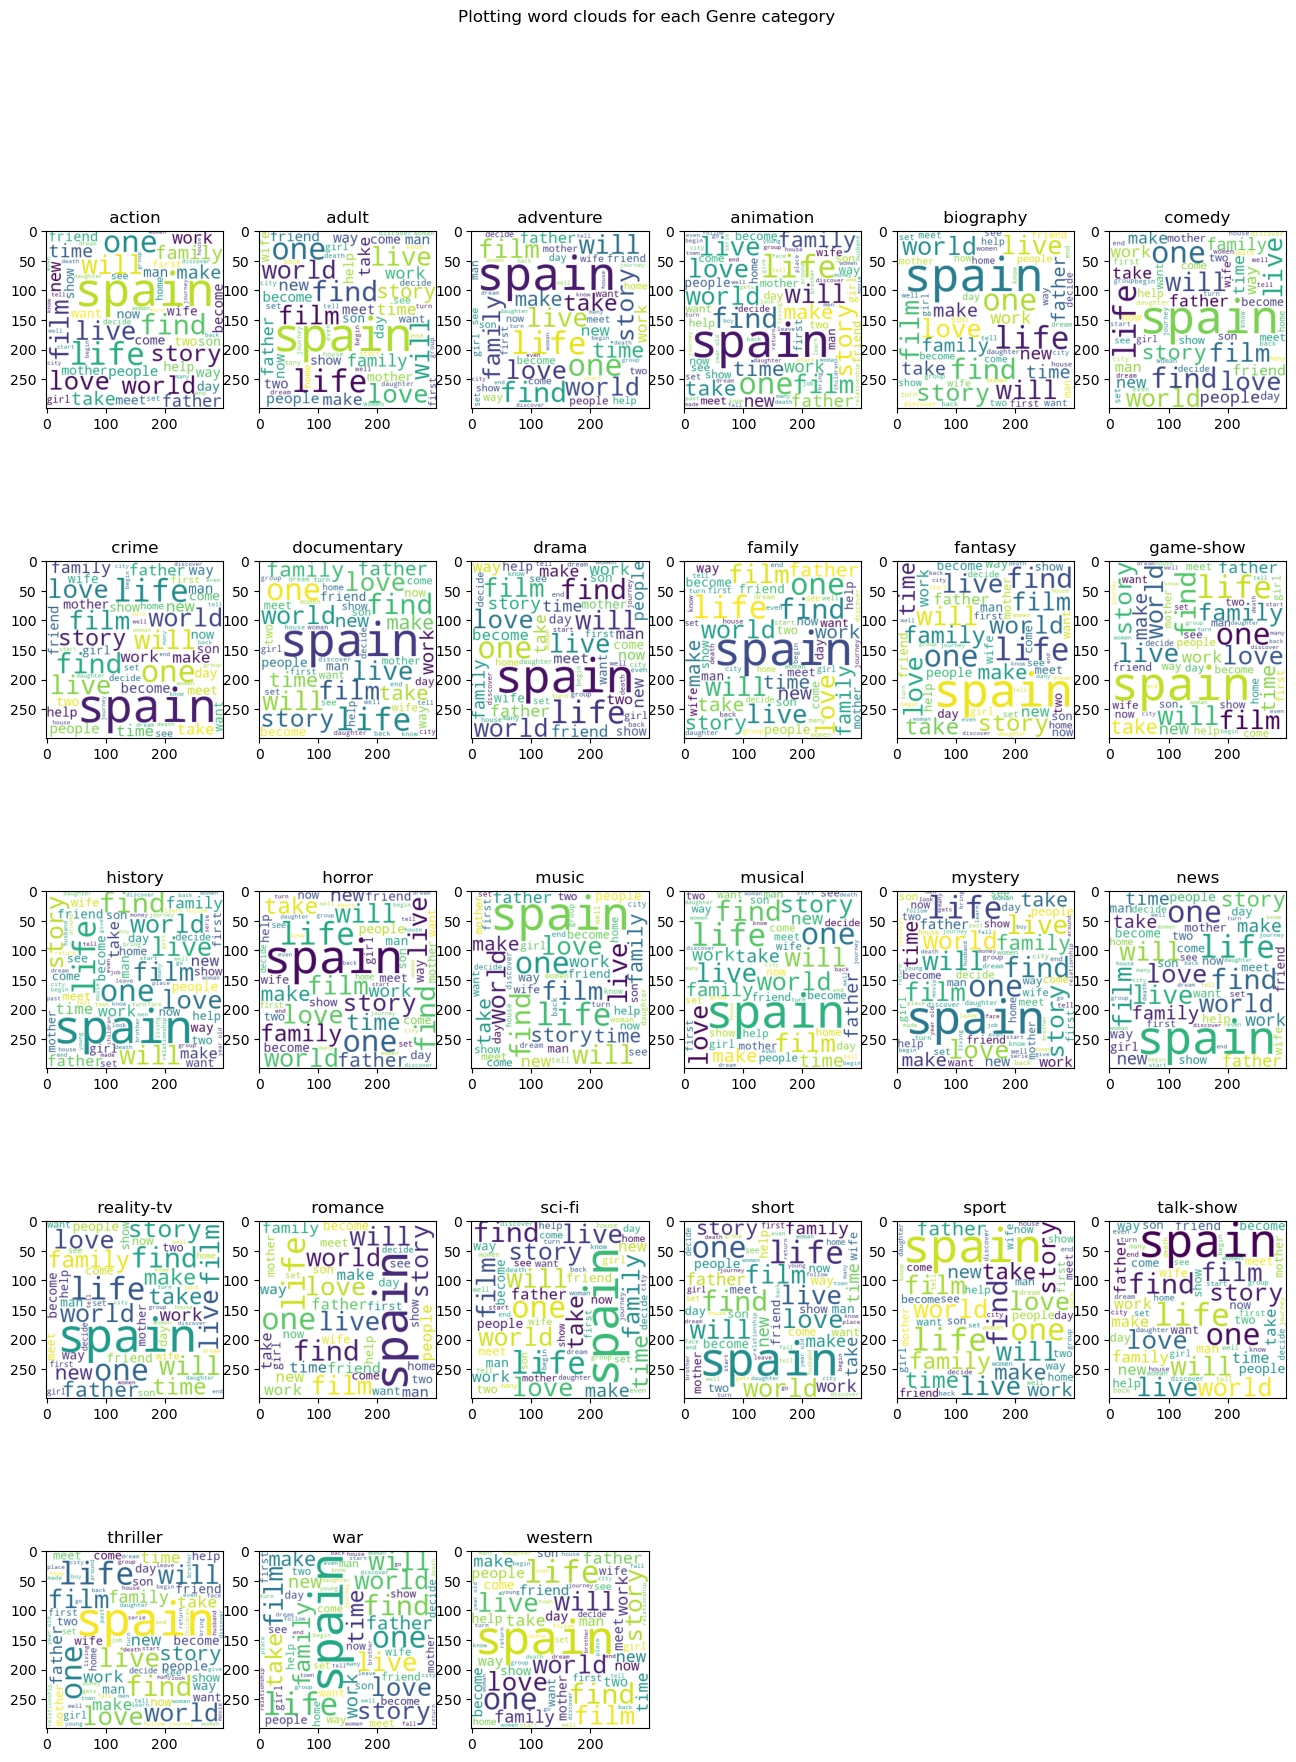

In [34]:
fig, axs = plt.subplots(nrows=5, ncols=6,figsize=(16,20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting word clouds for each Genre category')

for i in range(len(test_sol_df['Genre'].unique())):
    ax = axs[i//6,i%6]
    cloud = wc.generate(test_sol_df['Description'].str.cat(sep=" spain "))

    ax.imshow(cloud)
    ax.set_title(le.inverse_transform([i])[0])


for i in range(len(test_sol_df['Genre'].unique()), 5*6):
    axs.flatten()[i].axis('off')

plt.show()

In [35]:
corpus = []
for i in range(len(test_sol_df['Genre'].unique())):
    corpus_i = []
    for desc in test_sol_df[test_sol_df['Labeled Genre'] == i]['Processed Description'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)


# the length of corpus should be 27
print(len(corpus))

27


In [36]:
from collections import Counter

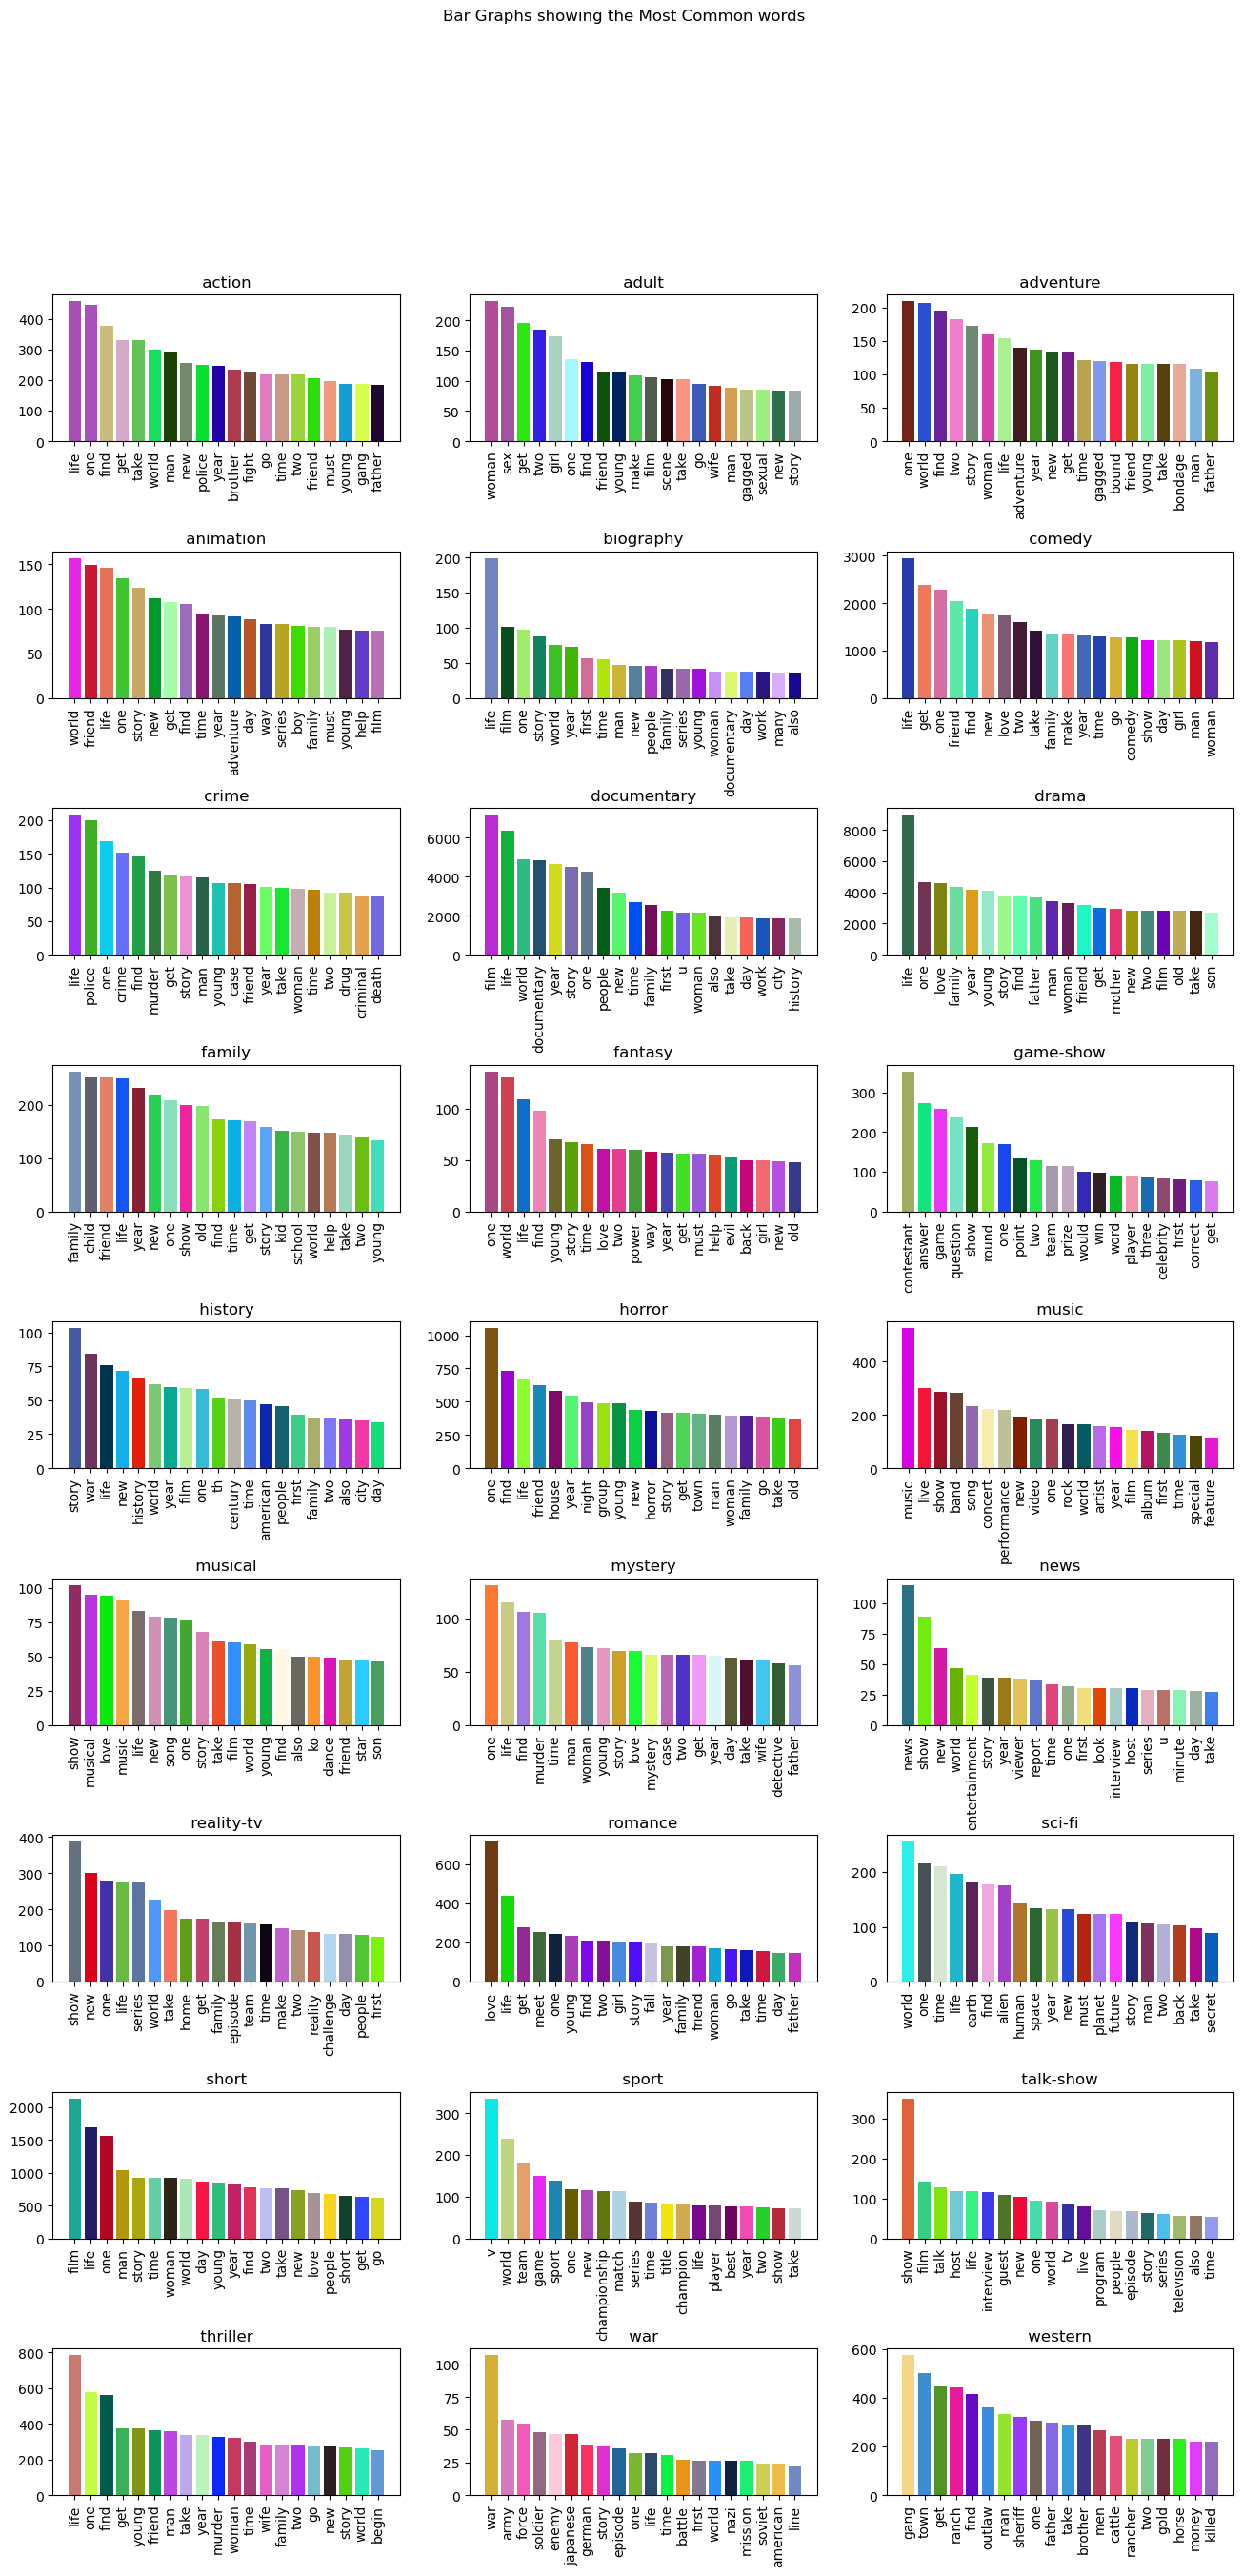

In [37]:
fig, axs = plt.subplots(nrows=9, ncols=3,figsize=(16,30))
plt.subplots_adjust(hspace=0.75)
fig.suptitle('Bar Graphs showing the Most Common words')

for i, l in enumerate(corpus):
    colors = np.random.rand(20, 3)
    ax = axs[i//3,i%3]
    df = pd.DataFrame(Counter(l).most_common(20))
    ax.bar(df[0], df[1], color=colors)
    ax.set_title(le.inverse_transform([i])[0])

    # Setting tick positions and labels
    ax.set_xticks(np.arange(len(df[0])))
    ax.set_xticklabels(df[0].tolist(),rotation=90)

plt.xticks(rotation='vertical')
plt.show()

In [38]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [39]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [40]:
wv = api.load('word2vec-google-news-300')

In [41]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [42]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)

    i = 0
    for w in sent.split():
        if w in wv:
            i += 1
            wv_res += wv[w]
    wv_res = wv_res/i
    return wv_res

In [43]:
test_sol_df['Vectorized'] = test_sol_df['Processed Description'].apply(sent_vec)
test_sol_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description,Vectorized
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",24,l r brane love life car apartment job especial...,"[0.024899996243990384, 0.046355027418870196, -..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5,spain march quico naughty child three belongin...,"[0.08577664693196614, 0.02395745479699337, 0.0..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7,one year life albin family shepherd north tran...,"[0.015762617003242923, 0.06466271742334906, -0..."
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8,father died spoken brother year serious cancer...,"[-0.0002125885527012712, 0.0666447009070445, 0..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8,known internationally martial art superstar br...,"[0.019041597173455056, 0.026341984780986656, 0..."


In [ ]:
X_train = test_sol_df['Vectorized'].tolist()
y_train = test_sol_df['Labeled Genre'].tolist()

In [45]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.linear_model import LogisticRegression

In [46]:
gnb = GaussianNB()
bnb = BernoulliNB()
lg = LogisticRegression(multi_class='ovr')

In [47]:
gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
lg.fit(X_train, y_train)

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [48]:
test_sol_df.columns

Index(['Id', 'Title', 'Genre', 'Description', 'Labeled Genre',
       'Processed Description', 'Vectorized'],
      dtype='object')

In [49]:
test_sol_df['Processed Description'] = test_sol_df['Description'].apply(preprocess_text)

In [50]:
test_sol_df['Vectorized'] = test_sol_df['Processed Description'].apply(sent_vec)

In [51]:
test_genres = test_sol_df['Genre']
test_sol_df['Labeled Genre'] = le.transform(test_genres)
test_sol_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description,Vectorized
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",24,l r brane love life car apartment job especial...,"[0.024899996243990384, 0.046355027418870196, -..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5,spain march quico naughty child three belongin...,"[0.08577664693196614, 0.02395745479699337, 0.0..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7,one year life albin family shepherd north tran...,"[0.015762617003242923, 0.06466271742334906, -0..."
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8,father died spoken brother year serious cancer...,"[-0.0002125885527012712, 0.0666447009070445, 0..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8,known internationally martial art superstar br...,"[0.019041597173455056, 0.026341984780986656, 0..."


In [52]:
X_test = test_sol_df['Vectorized'].tolist()
y_test = test_sol_df['Labeled Genre'].tolist()

In [53]:
print(len(X_test))
print(len(y_test))

54200
54200


In [54]:
y_pred = lg.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")
print(classification_report(y_pred,y_test))

Accuracy:  56.97416974169742 %
Weighted Avg Precision: 69.55035016607721 %
              precision    recall  f1-score   support

           0       0.28      0.48      0.36       777
           1       0.21      0.54      0.31       235
           2       0.14      0.54      0.22       204
           3       0.05      0.45      0.09        58
           4       0.00      0.00      0.00         0
           5       0.58      0.53      0.55      8145
           6       0.04      0.43      0.07        42
           7       0.83      0.64      0.72     17168
           8       0.77      0.53      0.63     19860
           9       0.08      0.43      0.14       148
          10       0.06      0.56      0.11        34
          11       0.49      0.86      0.62       111
          12       0.00      0.00      0.00         0
          13       0.55      0.60      0.57      1998
          14       0.47      0.65      0.55       530
          15       0.00      0.25      0.01         4
      

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
y_pred = gnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")
print(classification_report(y_pred,y_test))

Accuracy:  34.88745387453874 %
Weighted Avg Precision: 41.03633892344075 %
              precision    recall  f1-score   support

           0       0.25      0.33      0.28       978
           1       0.53      0.24      0.33      1313
           2       0.15      0.17      0.16       716
           3       0.21      0.17      0.19       616
           4       0.19      0.05      0.08      1051
           5       0.21      0.54      0.30      2837
           6       0.42      0.11      0.18      1864
           7       0.39      0.69      0.50      7367
           8       0.37      0.56      0.44      8902
           9       0.13      0.15      0.14       711
          10       0.38      0.10      0.16      1172
          11       0.71      0.43      0.53       321
          12       0.33      0.05      0.09      1500
          13       0.52      0.45      0.48      2530
          14       0.73      0.30      0.43      1764
          15       0.24      0.06      0.10      1124
      

In [56]:
y_pred = bnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")
print(classification_report(y_pred,y_test))

Accuracy:  38.06457564575646 %
Weighted Avg Precision: 40.98926571858191 %
              precision    recall  f1-score   support

           0       0.24      0.27      0.26      1177
           1       0.47      0.24      0.32      1137
           2       0.12      0.17      0.14       529
           3       0.16      0.17      0.16       463
           4       0.17      0.05      0.07       948
           5       0.30      0.46      0.36      4801
           6       0.35      0.12      0.18      1479
           7       0.42      0.66      0.52      8300
           8       0.46      0.55      0.50     11535
           9       0.13      0.23      0.17       453
          10       0.31      0.11      0.17       872
          11       0.68      0.39      0.49       337
          12       0.31      0.06      0.10      1252
          13       0.49      0.42      0.45      2565
          14       0.74      0.27      0.40      2001
          15       0.22      0.08      0.12       757
      